## Import Libraries

In [ ]:
import os
import shutil
import kaggle
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path = kagglehub.dataset_download("CooperUnion/cardataset")
print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /Users/toshalimohapatra/.cache/kagglehub/datasets/CooperUnion/cardataset/versions/1
['data.csv']


In [ ]:
df = pd.read_csv(f"{path}/data.csv")

## Data Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
## Observation
# Engine Fuel Type, Engine HP and Market Category have null values

In [ ]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler']
48

model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class']
915

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']
5

driven_wheels
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance']
71

vehicle_size
['Compact' 'Midsize' 'Large']
3

vehicle_style
['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## Distribution of Price

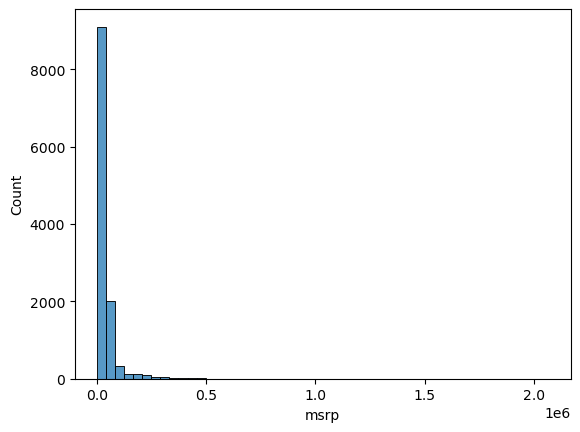

In [ ]:
sns.histplot(df["msrp"], bins = 50)
plt.show()

In [ ]:
## Observation
## This is a long tailed distribution, with very few cars priced greater than 1M

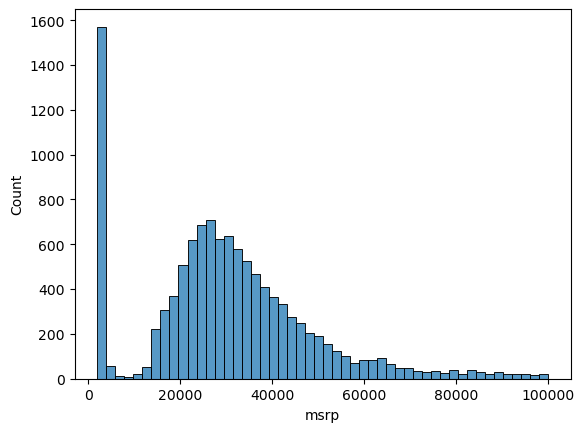

In [ ]:
# Check the distribution of the values that matter
sns.histplot(df["msrp"][df["msrp"] < 100000], bins= 50)
plt.show()

In [ ]:
## Observations
# There is one value, $1000 which seems to be unusually high

In [ ]:
## Same as adding 1 to each of the individual values in the cell
np.log1p([0, 1, 10, 100, 1000, 10000]) 

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478,
       9.21044037])

In [ ]:
# Aplly log distribution to price
price_logs = np.log1p(df["msrp"])

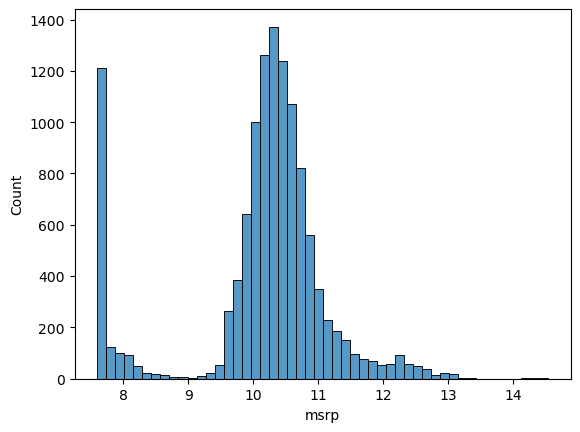

In [ ]:
sns.histplot(price_logs, bins = 50)
plt.show()

In [ ]:
## Observation
# Logarithmic price follows a normal distribution - Clear distribution of values with one peak
# Appropriate for model distribution, long tailed sistributions don't bring about good results

## Missing Values

In [ ]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
## Observations
# A few null values are there across fuel type, hp, cylinders, and number of doors, and market category

## Validation Framework

In [ ]:
# Split betweeen train, val, test = 0.6, 0.2, 0.2

In [ ]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [ ]:
n, n_train

(11914, 7150)

In [ ]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [ ]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [ ]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,Chevrolet,Cobalt,2008,regular unleaded,148.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,24,1385,14410
6720,Toyota,Matrix,2012,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,32,25,2031,19685
5878,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640,19795
11190,Volkswagen,Vanagon,1991,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873,2000
4554,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,21,15,5657,56260


In [ ]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [ ]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,Chevrolet,Cobalt,2008,regular unleaded,148.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,24,1385,14410
1,Toyota,Matrix,2012,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,32,25,2031,19685
2,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640,19795
3,Volkswagen,Vanagon,1991,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873,2000
4,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,21,15,5657,56260


## Linear Regression

In [ ]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

In [ ]:
y_train = np.log1p(df_train["msrp"].values)
y_test = np.log1p(df_test["msrp"].values)
y_val = np.log1p(df_val["msrp"].values)

In [ ]:
## Delete the pre-existing data  
del df_train["msrp"]
del df_test["msrp"]
del df_val["msrp"]

## Linear Regression Vector Form

In [ ]:
## Basic Dot Product Function
def dot (xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    return res      

In [ ]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [ ]:
## Dummy Values - Example

In [ ]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [ ]:
x1 = [1, 148, 24, 13]
x2 = [1, 132, 76, 2013]
x7 = [1, 452, 11, 82]

X = [x1, x2, x7] 
X = np.array(X)
X

array([[   1,  148,   24,   13],
       [   1,  132,   76, 2013],
       [   1,  452,   11,   82]])

In [ ]:
def linear_regression(X):
    return X.dot(w_new)

In [ ]:
linear_regression(X)

array([ 9.636, 15.556, 12.294])

## Normal Equation Form of Linear Regression

In [ ]:
X = [[148, 24, 1086],
    [132, 76, 2013],
    [421, 11, 822],
    [740, 20, 3154],
    [516, 84, 1212],
    [222, 10, 126],
    [174, 12, 5412],
    [216, 24, 6798],
    [898, 86, 980],]
X = np.array(X)
X

array([[ 148,   24, 1086],
       [ 132,   76, 2013],
       [ 421,   11,  822],
       [ 740,   20, 3154],
       [ 516,   84, 1212],
       [ 222,   10,  126],
       [ 174,   12, 5412],
       [ 216,   24, 6798],
       [ 898,   86,  980]])

In [ ]:
## Weight will be calculated as the dot product
## of gram matrix, X transpose and y

In [ ]:
XTX = X.T.dot(X)

In [ ]:
## Inverse of the XTX matrix:
XTX_inv = np.linalg.inv(XTX)

In [ ]:
## Check whether dot product leads to an identity matrix
XTX.dot(XTX_inv)

array([[ 1.00000000e+00,  9.07732334e-16,  2.69609793e-17],
       [ 2.88885881e-17,  1.00000000e+00, -8.28136172e-18],
       [-2.85094508e-16,  8.80947352e-17,  1.00000000e+00]])

In [ ]:
## Check whether we obtain a diagonal matrix
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [-0.,  0.,  1.]])

In [ ]:
## Create a matrix of ones by counting the number of rows
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
## stack the columns together by adding one to all elements of the matrix
X = np.column_stack([ones, X])

In [ ]:
y = [100, 150, 200, 345, 420, 112, 231, 776, 205]

In [ ]:
XTX = X.T.dot(X)

In [ ]:
XTX_inv = np.linalg.inv(XTX)

In [ ]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([3.34967943, 0.15529294, 0.96482659, 0.07571436])

In [ ]:
w0 = w_full[0]
w = w_full[1:]

In [ ]:
w0, w

(3.3496794263447947, array([0.15529294, 0.96482659, 0.07571436]))

In [ ]:
## Put everything in a function that returns 
## the bias and everything else is the weights
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

## Car Baseline Model

In [ ]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [ ]:
## Extract basic features out of the dataset
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [ ]:
X_train = df_train[base].values

In [ ]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [ ]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [ ]:
## Observation
## Null values occured because the underlying dataset has null values

In [ ]:
## Impute missing values
X_train = df_train[base].fillna(0).values

In [ ]:
w0, w = train_linear_regression(X_train, y_train)

In [ ]:
w0, w

(7.927257388070112,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [ ]:
y_pred = w0 + X_train.dot(w)

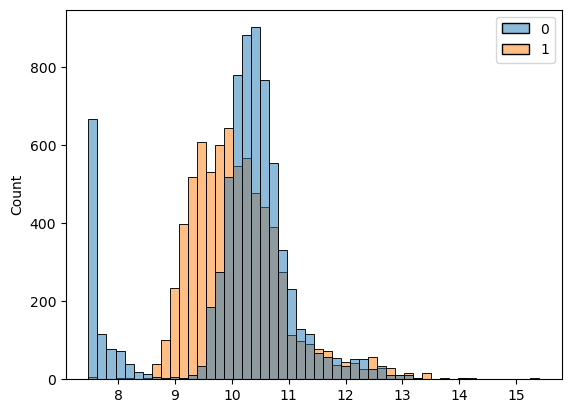

In [ ]:
sns.histplot([y_train, y_pred], bins = 50)
plt.show()
# sns.histplot

In [ ]:
## RMSE
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

0.7554192603920132

## Simple Feature Engineering

In [ ]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,Chevrolet,Cobalt,2008,regular unleaded,148.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,24,1385
1,Toyota,Matrix,2012,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,32,25,2031
2,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640
3,Volkswagen,Vanagon,1991,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873
4,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,BMW,4 Series,2015,premium unleaded (required),300.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Luxury,Performance",Midsize,Convertible,31,20,3916
7146,Volkswagen,Beetle,2015,premium unleaded (recommended),210.0,4.0,AUTOMATED_MANUAL,front wheel drive,2.0,"Hatchback,Performance",Compact,2dr Hatchback,30,24,873
7147,GMC,Sierra 1500,2015,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,22,17,549
7148,Rolls-Royce,Ghost,2014,premium unleaded (required),563.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,Performance",Large,Sedan,21,13,86


In [ ]:
## Observation
## Year variable will be a good feature to add
## Most recent car => High Price
# Older car => Low Price

In [ ]:
## Find out the latest year of manufacturing
print(df["year"].max())
## Find out the age of the cars
2017- df_train["year"]

2017


0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [ ]:
# We can add this information to a function
def  prepare_X(df):
    df = df.copy()
    df["age"] = 2017 - df_train["year"]
    features = base + ["age"]
    
    df_num = df[base]
    df_num = df_num.fillna(df_num.median())
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)

In [ ]:
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7496911329574718

## Categorical Variables

In [ ]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [ ]:
## Implement one-hot encoding
for v in [2, 3, 4]:
    df_train["num_doors_%s" % v] = (df_train["number_of_doors"] == v).astype(int)

In [ ]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,Chevrolet,Cobalt,2008,regular unleaded,148.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,24,1385,1,0,0
1,Toyota,Matrix,2012,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,32,25,2031,0,0,1
2,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640,0,0,1
3,Volkswagen,Vanagon,1991,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,NaN,Large,Passenger Minivan,18,16,873,0,1,0
4,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,21,15,5657,0,0,1


In [ ]:
# We can add this information to a function
def  prepare_X(df):
    df = df.copy()
    features = features.copy()

    df["age"] = 2017 - df_train["year"]
    features = base.append("age")

    for v in [2, 3, 4]:
        df_train["num_doors_%s" % v] = (df_train["number_of_doors"] == v).astype(int)
    features = features.append("num_doors_%s" % v)
    
    df_num = df[features]
    df_num = df_num.fillna(df_num.median())
    X = df_num.values
    return X

In [ ]:
prepare_X(df_train)

UnboundLocalError: cannot access local variable 'features' where it is not associated with a value